In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_full = pd.read_csv('data/The_Dataset_v1-1.csv', parse_dates = ["Date"])
df = df_full.copy()
# remove NAs
df = df.dropna().copy()

df.describe()

System ID                           Date  Efficiency (kWh/kW)  \
count   78330.000000                          78330         78330.000000   
mean    21768.625354  2023-09-12 00:33:05.446189056             2.467899   
min       973.000000            2022-03-01 00:00:00             0.000000   
25%      4611.000000            2022-12-03 00:00:00             0.879000   
50%      7449.000000            2023-09-09 00:00:00             2.231500   
75%     37543.000000            2024-06-17 00:00:00             3.783000   
max    106682.000000            2025-04-14 00:00:00            12.000000   
std     24474.321892                            NaN             1.810254   

       surface_pressure_mean  weather_code  sunshine_duration  \
count           78330.000000  78330.000000       78330.000000   
mean             1003.809452     42.273561       25075.200732   
min               937.417240      0.000000           0.000000   
25%               995.467725      3.000000        9387.538000   
50%              1005.043700     51.000000       25200.000000   
75%              1013.497000     63.000000       39750.814750   
max              1044.024300     99.000000       62877.720000   
std                13.831112     31.644025       17294.046198   

       daylight_duration  precipitation_sum  precipitation_hours  \
count       78330.000000       78330.000000         78330.000000   
mean        44325.399450           2.255553             3.698328   
min         22149.295000           0.000000             0.000000   
25%         33750.524500           0.000000             0.000000   
50%         44460.762500           0.200000             1.000000   
75%         54947.891000           2.400000             6.000000   
max         66714.110000          92.299995            24.000000   
std         11430.982406           4.643978             5.037755   

       wind_direction_10m_dominant  cloud_cover_min  cloud_cover_mean  \
count                 78330.000000     78330.000000      78330.000000   
mean                    194.968305        27.601685         73.114120   
min                       0.000005        -1.000000          0.000000   
25%                     132.584213         0.000000         59.208332   
50%                     212.965295         8.000000         79.333336   
75%                     258.382290        53.000000         93.000000   
max                     360.000000       100.000000        100.041664   
std                      90.056697        33.802260         23.994323   

       temperature_2m_mean  relative_humidity_2m_min  wind_speed_10m_mean  \
count         78330.000000              78330.000000         78330.000000   
mean             10.444220                 66.137942            14.641156   
min              -8.778750                 10.000000             1.039368   
25%               6.918084                 56.000000             9.398322   
50%              10.488668                 67.000000            13.411277   
75%              14.003334                 77.000000            18.570002   
max              31.674667                100.000000            70.680000   
std               5.036846                 14.014209             7.164125   

       shortwave_radiation_sum  
count             78330.000000  
mean                 10.576068  
min                   0.030000  
25%                   3.560000  
50%                   8.930000  
75%                  16.570000  
max                  31.990000  
std                   7.861107

In [59]:
# clip some values of cloud cover mean which are >100 to 100
df['cloud_cover_mean'] = df['cloud_cover_mean'].clip(upper=100)
# remove some rows where cloud cover min is -1
df = df[df['cloud_cover_min'] != -1]

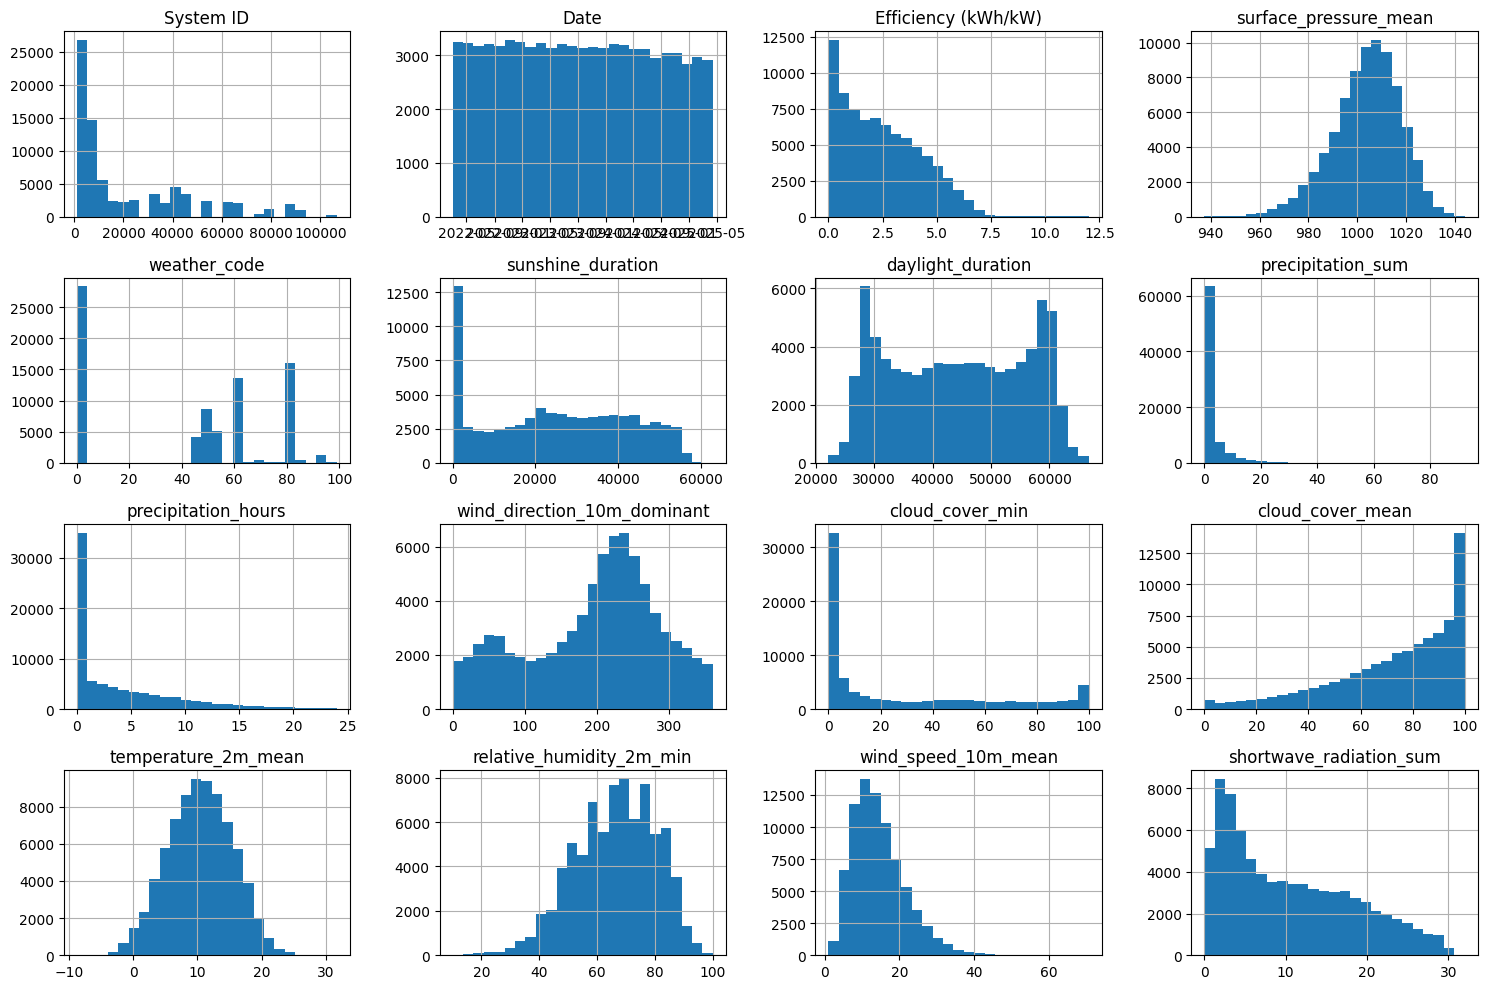

In [60]:
# Variable summaries look good, now histograms
df.hist(bins=25, figsize=(15, 10))
plt.tight_layout()
plt.show()

weather_code
0.0       458
1.0       597
2.0      1523
3.0     25776
45.0     4127
48.0      315
51.0     8333
53.0     3763
55.0     1317
56.0        6
61.0    11334
63.0     2251
65.0       81
66.0       26
71.0      371
73.0      172
75.0       11
77.0       80
80.0    15043
81.0      919
82.0        1
85.0      374
86.0       17
95.0     1213
96.0      181
99.0       15
Name: count, dtype: int64


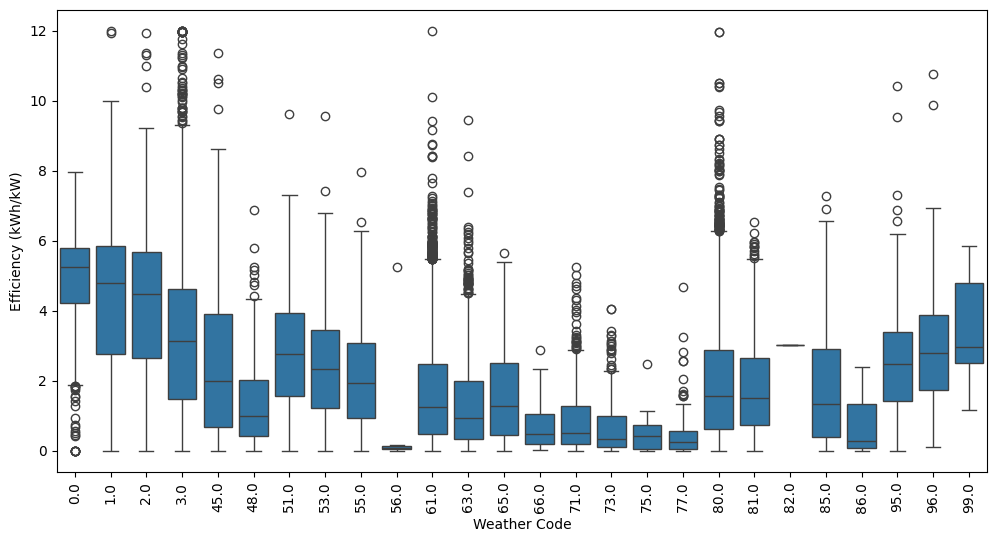

In [61]:
# Histograms look good.
# The weather code variable needs to be mapped onto categories (currently has numbers representing weather codes)
# Start by looking at the frequencies of each weather code
print(df['weather_code'].value_counts().sort_index())

# Boxplots of efficiency by weather code
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='weather_code', y='Efficiency (kWh/kW)')
plt.xlabel('Weather Code')
plt.ylabel('Efficiency (kWh/kW)')
plt.xticks(rotation=90)
plt.show()

In [62]:
# The following mapping of weather codes looks appropriate and leaves no sparse categories
weather_map = {
    0: 'clear',
    1: 'partly_cloudy', 2: 'partly_cloudy',
    3: 'overcast',
    45: 'fog', 48: 'fog',
    51: 'drizzle', 53: 'drizzle', 55: 'drizzle',
    56: 'drizzle', 57: 'drizzle',
    61: 'rain', 63: 'rain', 65: 'rain',
    66: 'rain', 67: 'rain',
    71: 'snow', 73: 'snow', 75: 'snow',
    77: 'snow',
    80: 'rain_showers', 81: 'rain_showers', 82: 'rain_showers',
    85: 'snow', 86: 'snow',
    95: 'thunderstorm',
    96: 'thunderstorm', 99: 'thunderstorm'
}
df['weather_category'] = df['weather_code'].map(weather_map)
df = pd.get_dummies(df, columns=['weather_category'], drop_first=True)
df = df.drop(columns=['weather_code'])

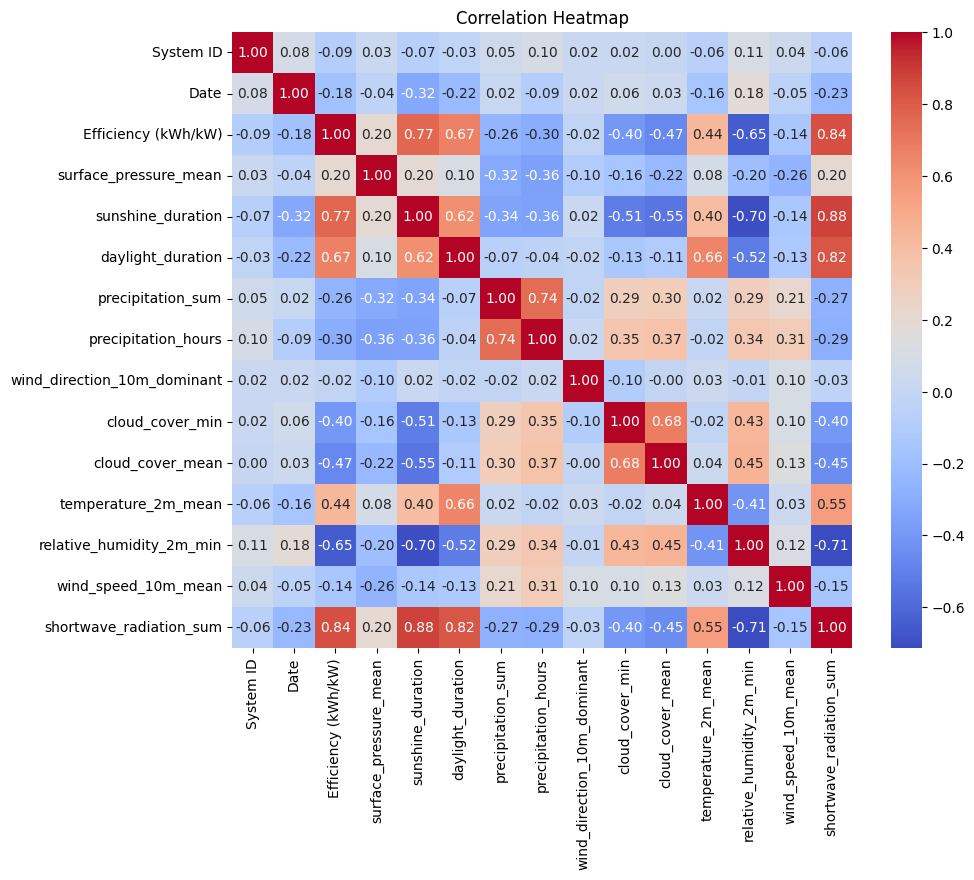

In [63]:
# calculate correlations, excluding the new dummy variables
cols_to_exclude = [col for col in df.columns if col.startswith('weather_category_')]
corr_matrix = df.drop(columns = cols_to_exclude).corr()

# plot heatmap of the correlations of all pairs of variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

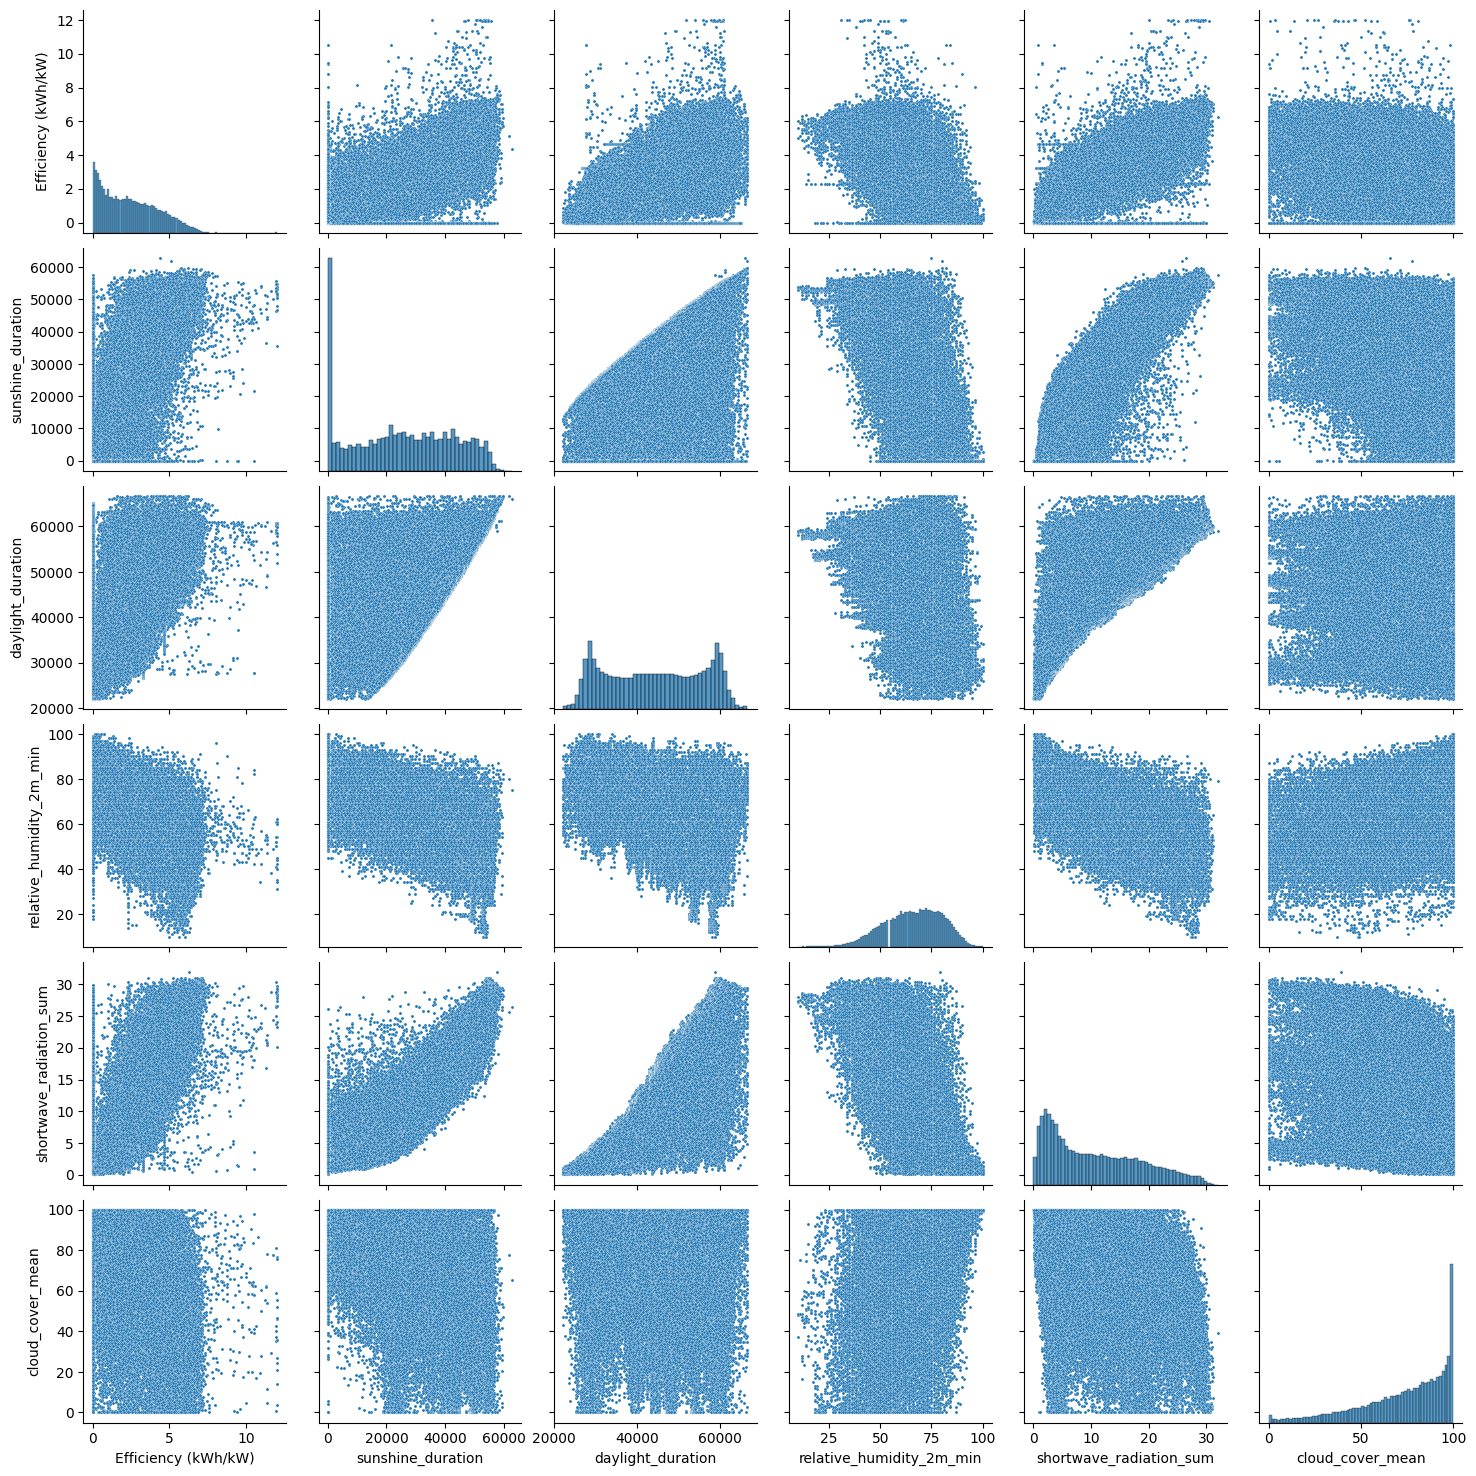

In [64]:
# pair plot of the variables with the strongest linear correlations with efficiency (plotting everything is too much)
sns.pairplot(df[["Efficiency (kWh/kW)", "sunshine_duration", "daylight_duration",
                 "relative_humidity_2m_min", "shortwave_radiation_sum", "cloud_cover_mean"]],
            plot_kws={"s": 5})

In [65]:
# Noticing some lines in the plots with efficiency, let's see where they are:
print(df["Efficiency (kWh/kW)"].value_counts())

Efficiency (kWh/kW)
0.000    1869
2.278     191
0.255     136
0.251     122
3.667     114
         ... 
7.419       1
6.706       1
7.346       1
7.542       1
7.490       1
Name: count, Length: 7192, dtype: int64


In [66]:
# 2.278 is a very frequent value, is it associated with particular dates or a system?
print(df_full[df_full["Efficiency (kWh/kW)"] == 2.278]["Date"].value_counts())
print(df_full[df_full["Efficiency (kWh/kW)"] == 2.278]["System ID"].value_counts())

Date
2022-10-08    2
2025-01-09    1
2023-02-08    1
2023-05-30    1
2023-01-17    1
             ..
2022-03-03    1
2022-03-02    1
2023-08-12    1
2024-06-03    1
2024-06-04    1
Name: count, Length: 190, dtype: int64
System ID
3099     180
1556       2
42586      2
4126       1
6229       1
19296      1
5975       1
4742       1
7449       1
4592       1
Name: count, dtype: int64


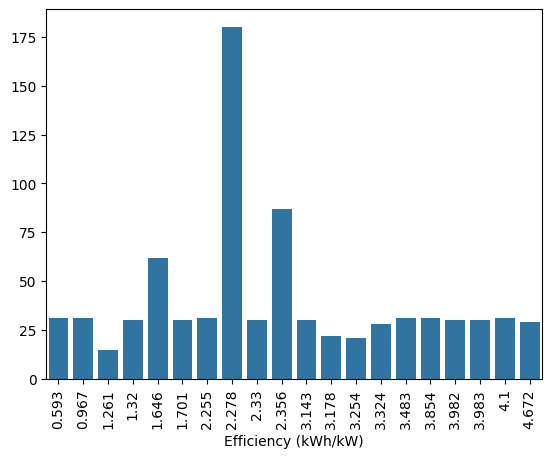

In [67]:
# System 3099 has 180 of the 191 instances of 2.278.
# Let's see what is going on for 3099:
value_counts = df_full[df_full["System ID"] == 3099]["Efficiency (kWh/kW)"].value_counts()

sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xticks(rotation=90)
plt.show()

In [68]:
# Clearly, there should be more unique values for efficiency over thousands of days.
# Let's remove system 3099 (in a new dataframe).
df_edit = df.copy()
df_edit = df_edit[df_edit["System ID"] != 3099]

In [69]:
# Let's see if there are other systems with very few unique values of efficiency:
all_sids = df_edit["System ID"].drop_duplicates()
sid_unique_counts = []

for sid in all_sids:
    unique_count = df_edit[df_edit["System ID"] == sid]["Efficiency (kWh/kW)"].nunique()
    sid_unique_counts.append((unique_count, sid))

# Print the sorted results
sid_unique_counts.sort()
for unique_count, sid in sid_unique_counts:
    print(f"{unique_count} unique values for System ID {sid}")

1 unique values for System ID 4113
1 unique values for System ID 8224
27 unique values for System ID 3641
27 unique values for System ID 32351
69 unique values for System ID 6090
94 unique values for System ID 46979
102 unique values for System ID 14745
150 unique values for System ID 106682
166 unique values for System ID 42343
210 unique values for System ID 22778
223 unique values for System ID 86644
235 unique values for System ID 3036
238 unique values for System ID 93127
258 unique values for System ID 6125
271 unique values for System ID 66986
340 unique values for System ID 75813
371 unique values for System ID 51963
380 unique values for System ID 4926
411 unique values for System ID 6633
489 unique values for System ID 37543
573 unique values for System ID 6266
616 unique values for System ID 16752
630 unique values for System ID 5022
686 unique values for System ID 3764
738 unique values for System ID 6378
800 unique values for System ID 4611
823 unique values for System ID 

1 unique values for System ID 8224


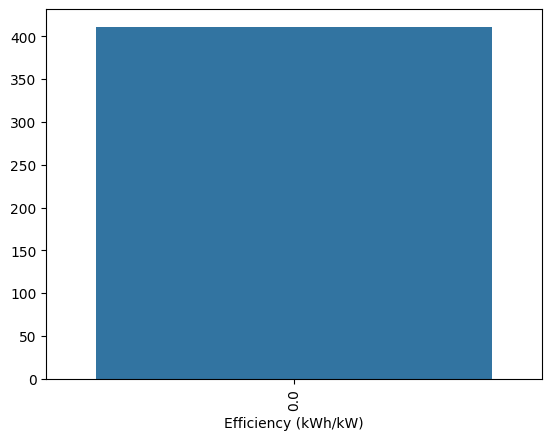

1 unique values for System ID 4113


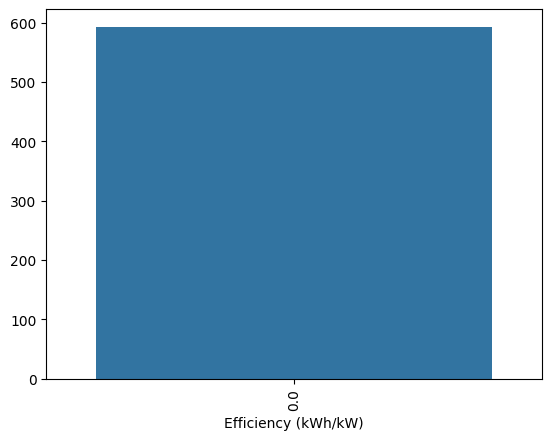

27 unique values for System ID 32351


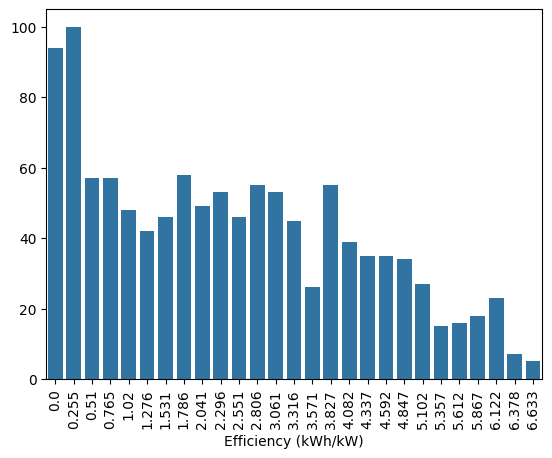

69 unique values for System ID 6090


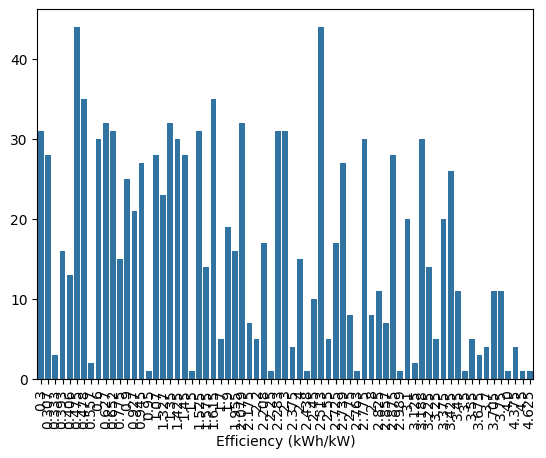

94 unique values for System ID 46979


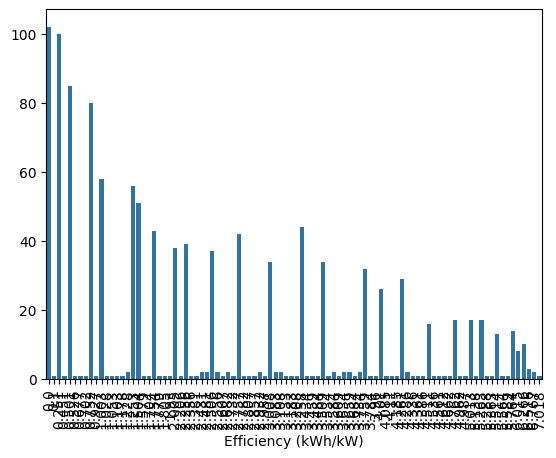

27 unique values for System ID 3641


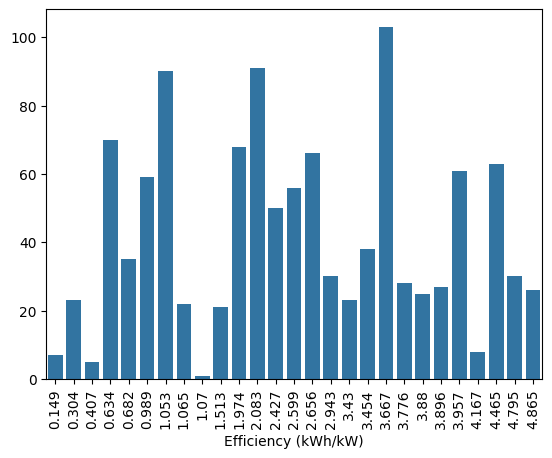

In [70]:
# Plot bar charts for systems with very few unique values of efficiency.
for sid in (8224, 4113, 32351, 6090, 46979, 3641):
    print(f"{len(df_edit[df_edit["System ID"] == sid]["Efficiency (kWh/kW)"].unique())} unique values for System ID {sid}")
    value_counts = df_edit[df_edit["System ID"] == sid]["Efficiency (kWh/kW)"].value_counts()

    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=90)
    plt.show()

In [71]:
# The first two sids have 0 efficiency every day. The last four sids have a small set of unique efficiency values.
sids_to_delete = (8224, 4113, 32351, 46979, 3641, 6090)
for sid in sids_to_delete:
    df_edit = df_edit[df_edit["System ID"] != sid]

In [72]:
# Let's take another look at the frequency of the efficiency values
print(df_edit["Efficiency (kWh/kW)"].value_counts().head(50))

Efficiency (kWh/kW)
0.000    669
0.200     78
0.400     66
0.420     63
0.300     63
0.150     57
0.210     56
0.145     53
0.450     53
0.250     53
0.525     50
0.325     49
1.200     46
0.475     45
0.800     44
0.378     44
0.291     43
0.350     42
0.182     42
0.600     42
0.375     42
0.364     41
0.500     41
0.231     41
0.225     40
0.575     39
0.390     39
0.691     39
0.625     39
0.270     39
0.222     38
0.327     38
0.360     38
0.323     37
4.000     37
0.109     37
0.550     37
0.240     37
0.425     37
0.436     37
1.051     36
0.255     36
0.286     36
0.850     36
0.775     35
0.462     35
0.133     34
0.301     34
0.330     34
0.675     34
Name: count, dtype: int64


In [73]:
# Check these values of efficiency by system ID
for value in (0, 0.3, 0.475, 0.2, 0.6, 0.4, 0.42, 2.513, 1.525, 0.15, 0.21, 1.425, 0.145, 2.079):
    print(f"Efficiency - {value}, top 5 contributors")
    print(df_edit[df_edit["Efficiency (kWh/kW)"] == value]["System ID"].value_counts().head(5))

Efficiency - 0, top 5 contributors
System ID
37543    372
51963     37
5116      26
3036      23
66986     22
Name: count, dtype: int64
Efficiency - 0.3, top 5 contributors
System ID
3764     11
6125     10
86644     9
3036      6
2829      3
Name: count, dtype: int64
Efficiency - 0.475, top 5 contributors
System ID
86644    13
6125      7
87747     4
7816      2
31056     2
Name: count, dtype: int64
Efficiency - 0.2, top 5 contributors
System ID
86644    16
6125     16
66986     9
51963     6
31056     3
Name: count, dtype: int64
Efficiency - 0.6, top 5 contributors
System ID
86644    11
6125      9
66986     6
51963     4
22850     2
Name: count, dtype: int64
Efficiency - 0.4, top 5 contributors
System ID
42343    15
86644    12
6125     11
66986     6
51963     4
Name: count, dtype: int64
Efficiency - 0.42, top 5 contributors
System ID
3764     13
93127    13
16752     8
3036      7
87747     2
Name: count, dtype: int64
Efficiency - 2.513, top 5 contributors
System ID
4126     2
112

In [74]:
# 37543 has a period where there is 0 efficiency and "not sure" recorded in the condition column.
# Looking at the systems 51963 and 5116, the two systems with the most 0s after 37543, we see that all of them have "not sure"
# in the condition column in pvoutput.org, and generally occur on consecutive days, suggesting repairs/maintenance/deactivation.
# Let's drop all rows where efficiency is 0:
df_edit = df_edit[df_edit["Efficiency (kWh/kW)"] != 0]

222 unique values for System ID 86644


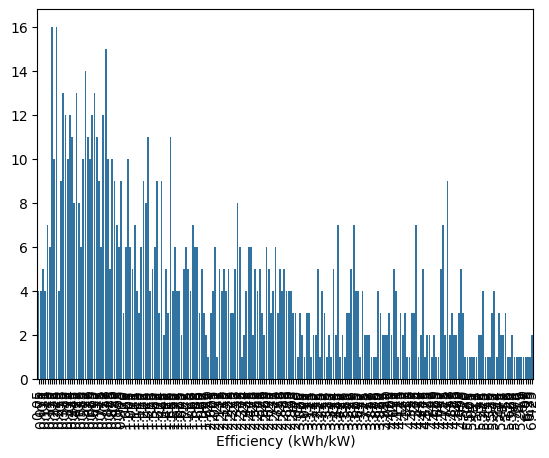

257 unique values for System ID 6125


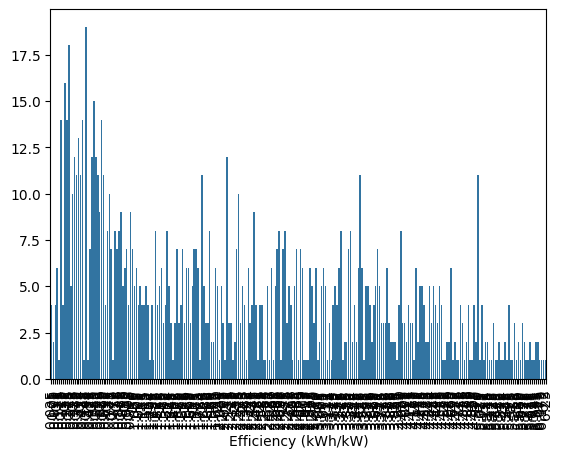

685 unique values for System ID 3764


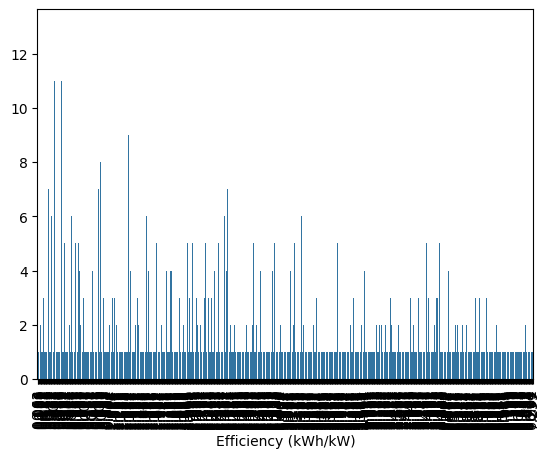

370 unique values for System ID 51963


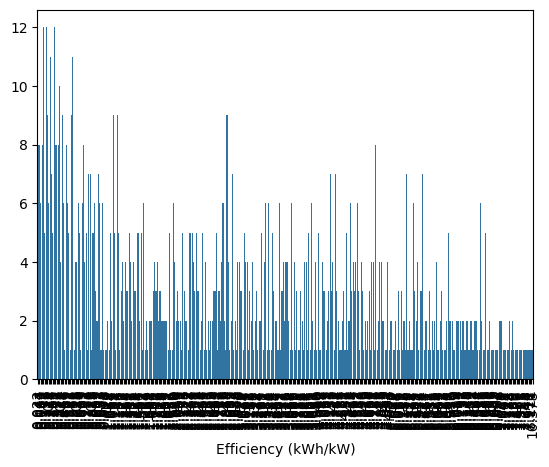

977 unique values for System ID 5116


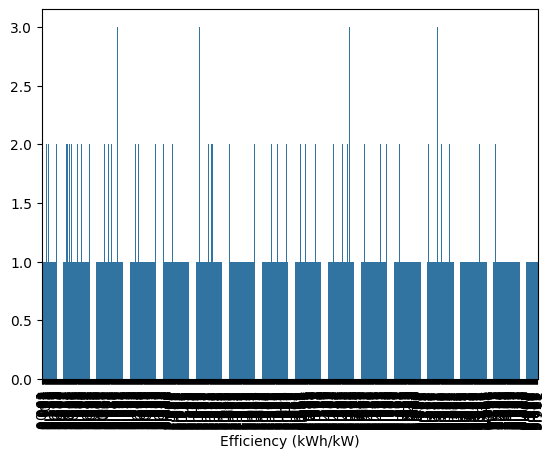

234 unique values for System ID 3036


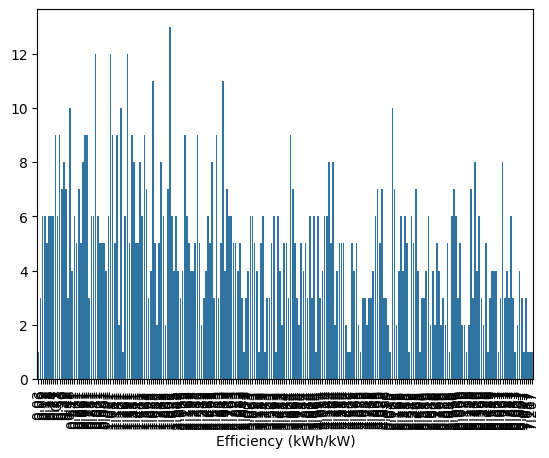

270 unique values for System ID 66986


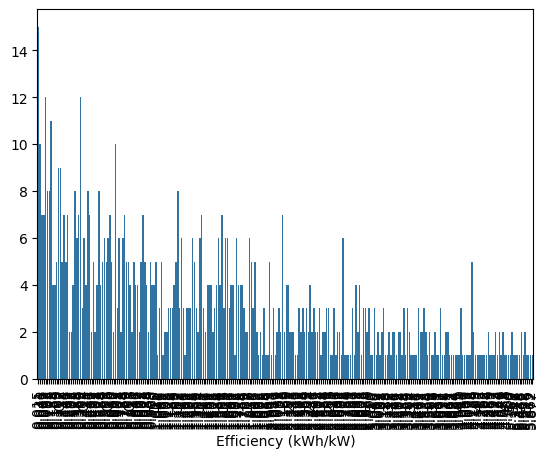

In [75]:
# Plot some more systems that look suspect
for sid in (86644, 6125, 3764, 51963, 5116, 3036, 66986):
    print(f"{len(df_edit[df_edit["System ID"] == sid]["Efficiency (kWh/kW)"].unique())} unique values for System ID {sid}")
    value_counts = df_edit[df_edit["System ID"] == sid]["Efficiency (kWh/kW)"].value_counts()

    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=90)
    plt.show()

102 unique values for System ID 14745


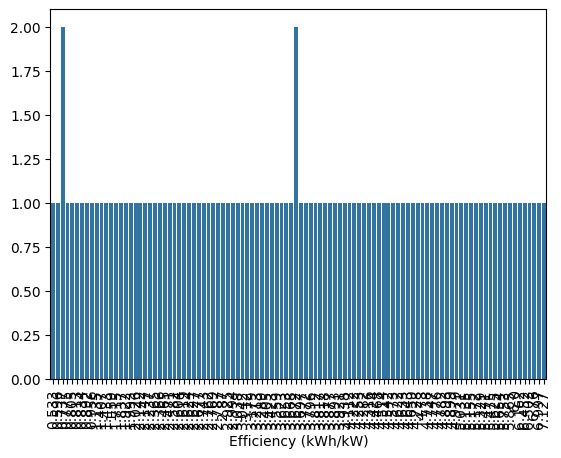

165 unique values for System ID 42343


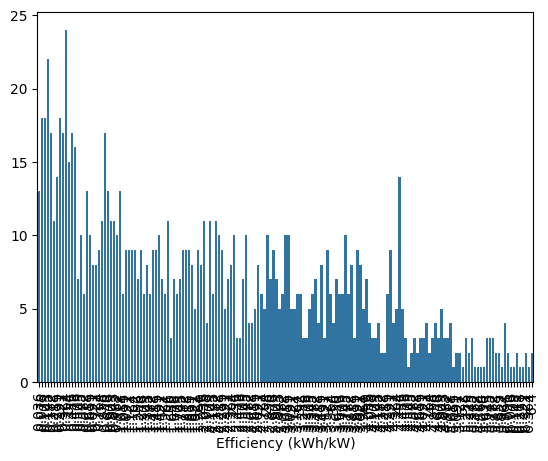

150 unique values for System ID 106682


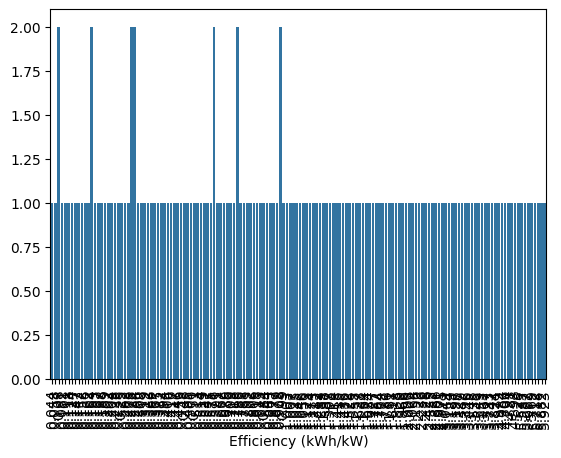

209 unique values for System ID 22778


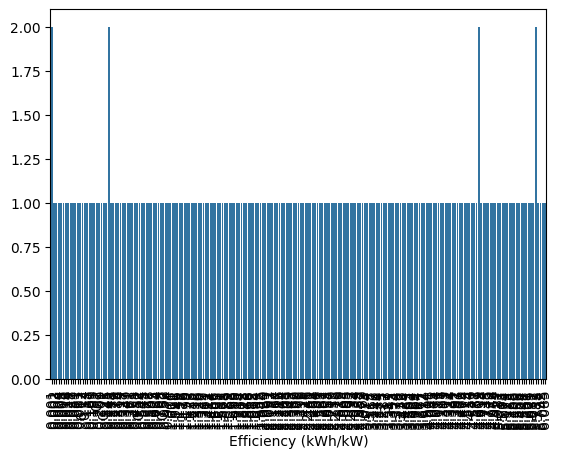

In [76]:
# None of these systems look erroneous according to these plots, they just have low precision values.
# No issues when inspecting the systems on pvoutput.org either.
# Finally, check a few more systems with relatively few unique values of efficiency.
for sid in (14745, 42343, 106682, 22778):
    print(f"{len(df_edit[df_edit["System ID"] == sid]["Efficiency (kWh/kW)"].unique())} unique values for System ID {sid}")
    value_counts = df_edit[df_edit["System ID"] == sid]["Efficiency (kWh/kW)"].value_counts()

    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=90)
    plt.show()

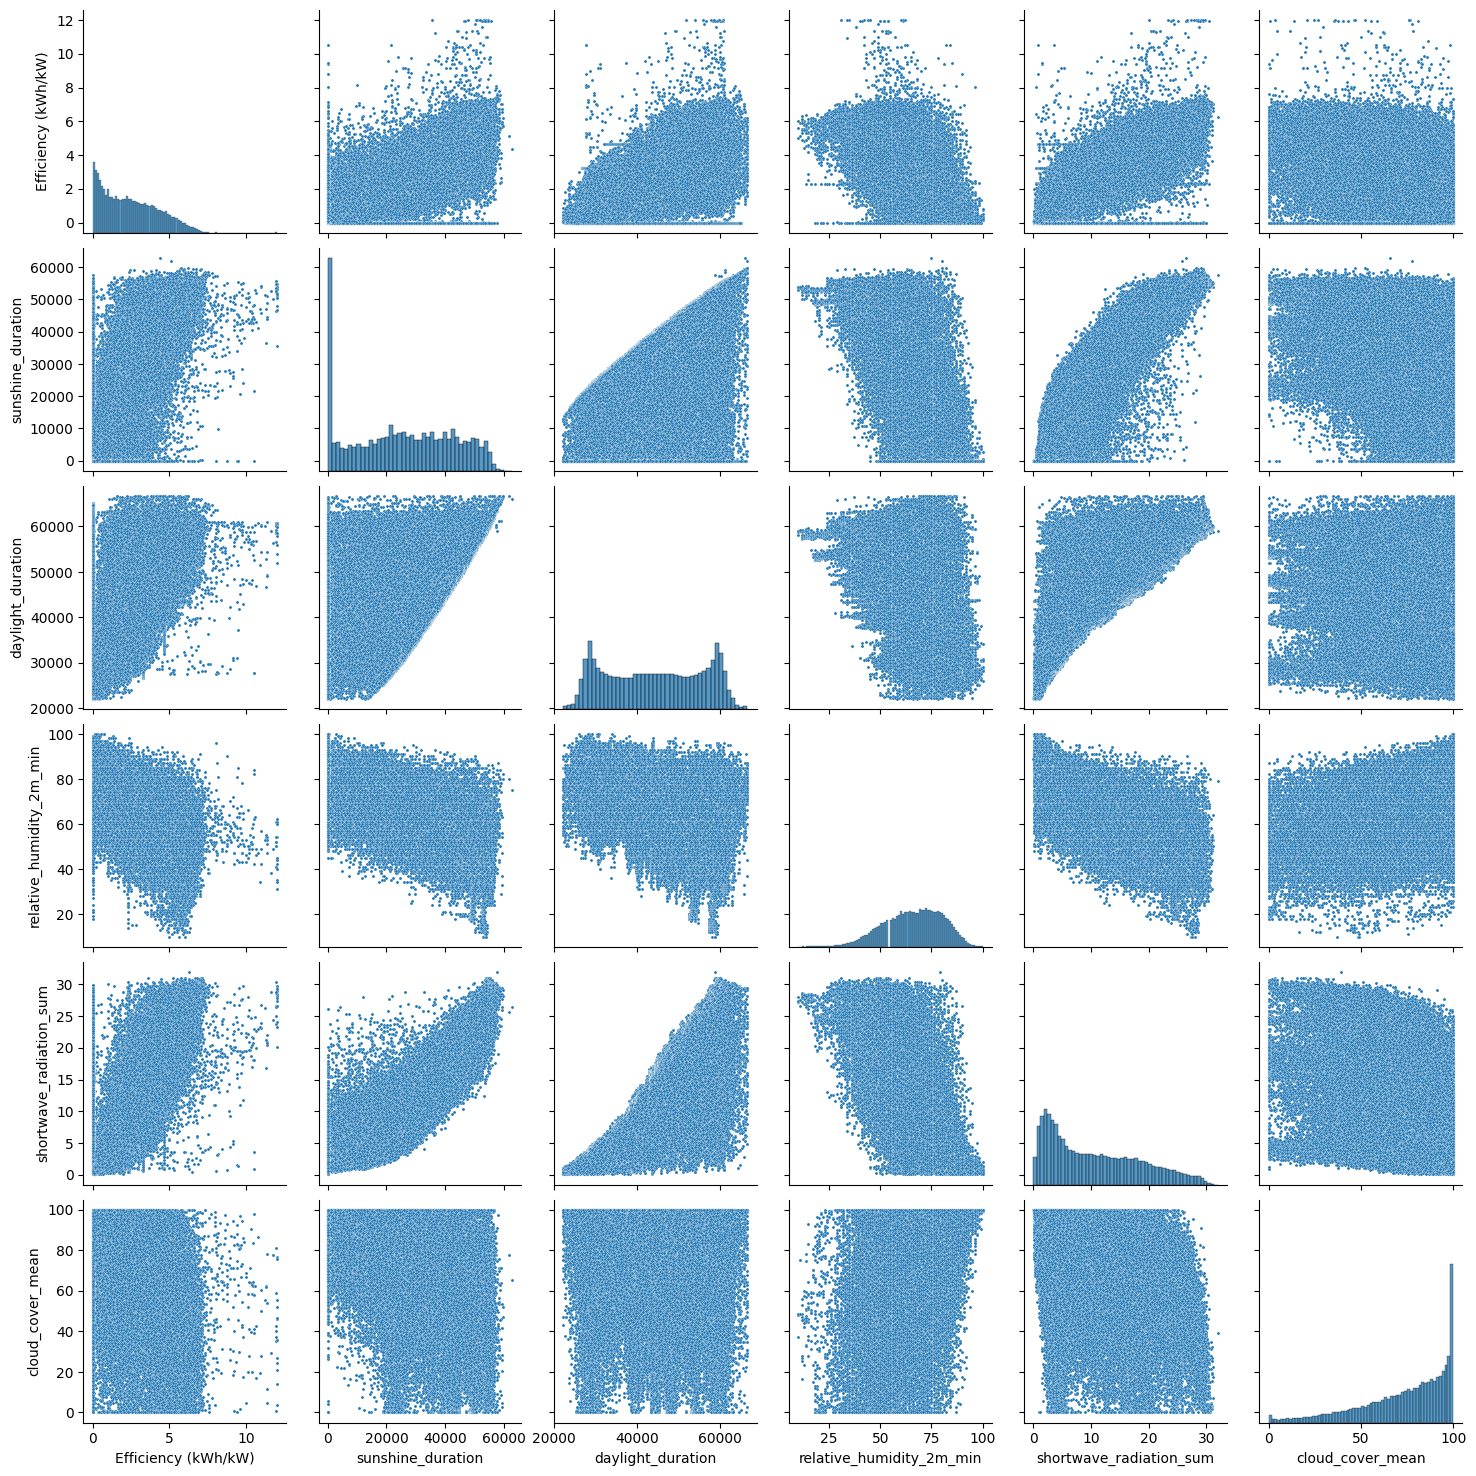

In [22]:
# No issues after looking at them all in pvoutout.org.
# Now that the data are clean, let's check the pair plot again to make sure the lines of equal efficiency are gone:
sns.pairplot(df[["Efficiency (kWh/kW)", "sunshine_duration", "daylight_duration",
                 "relative_humidity_2m_min", "shortwave_radiation_sum", "cloud_cover_mean"]],
            plot_kws={"s": 5})

In [23]:
# Finally, add functions to "data_cleaning.py" to automatically do all the data cleaning in this notebook.